nr of spikes: 1


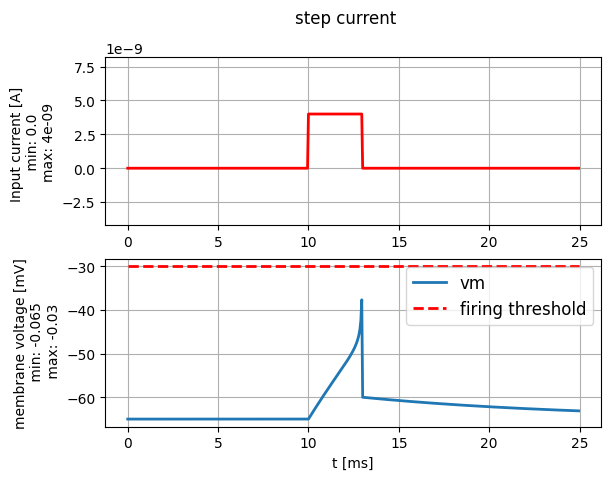

In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=10, t_end=12, unit_time=b2.ms, amplitude=4.* b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=25*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

# 2.1
threshold를 바꾸면 어떻게 결과가 변하는가? 

threshold가 바뀌어도 속도가 너무 빠르기 때문에 같은 결과가 나오게 된다.

In [6]:
exp_IF.RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV

nr of spikes: 7


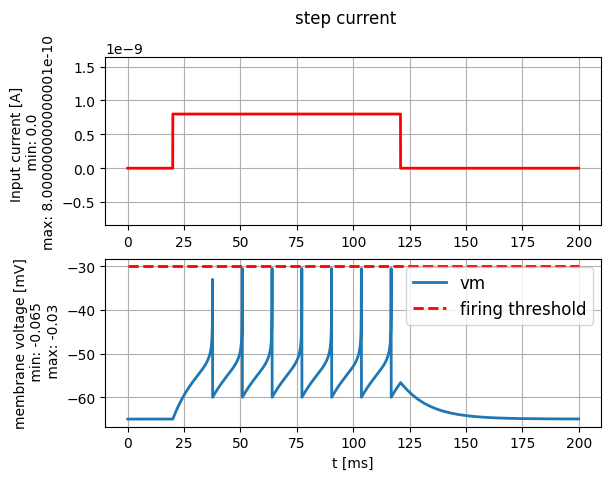

In [8]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

# 2.2

숙제 
duration = [1,2,4,8,16,32,64]

Result spiked :  [8.58, 4.42, 2.34, 1.31, 0.8, 0.56, 0.46] [1, 1, 1, 1, 1, 1, 1]
nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

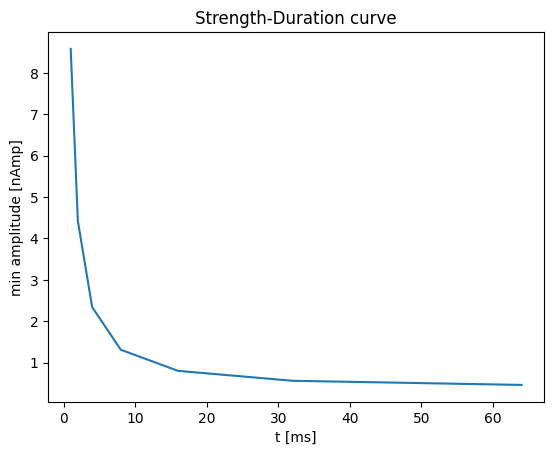

In [56]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

i=6  #change i and find the value that goes into min_amp
durations = [1,   2,   4,   8,   16,   32,  64]
min_amp =   [8.58, 4.42, 2.34, 1.31, 0.8, 0.56, 0.46]

val_spike = []
for i in range(7):
    t=durations[i]
    I_amp = min_amp[i]*b2.namp
    title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)
    
    input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)
    
    state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)
    val_spike.append(spike_monitor.count[0])
print("Result spiked : ",min_amp,  val_spike)
val_not_spike = []

# for i in range(7):
#     t=durations[i]
#     min_amp[i]-=0.01
#     I_amp = min_amp[i]*b2.namp
#     title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)
    
#     input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)
    
#     state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)
#     val_not_spike.append(spike_monitor.count[0])
# print("Result not spiked : ", min_amp, val_not_spike)


# plot_tools.plot_voltage_and_current_traces(state_monitor, input_current, title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike, legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

Text(0.5, 0, 't [ms]')

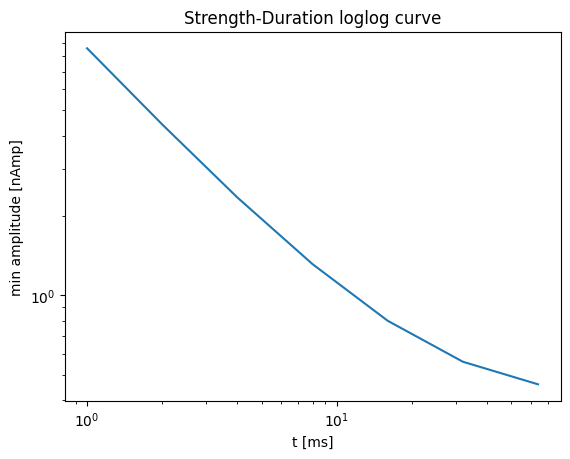

In [63]:
plt.loglog(durations,min_amp)
plt.title("Strength-Duration loglog curve")
plt.ylabel("min amplitude [nAmp]")
plt.xlabel("t [ms]")

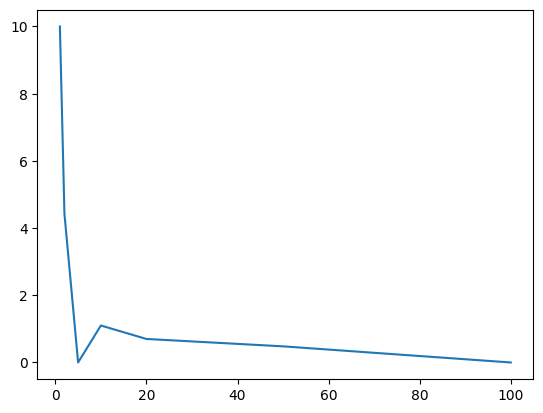

In [13]:
plt.plot(durations, min_amp)

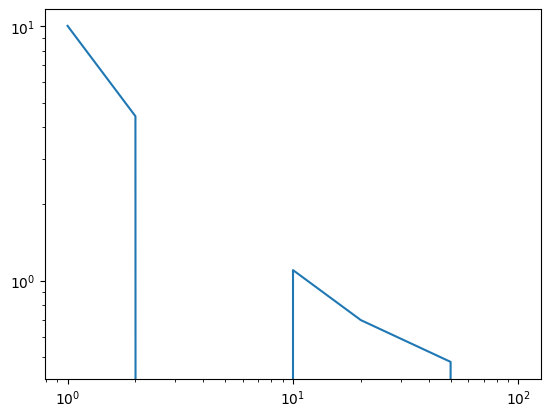

In [14]:
plt.loglog(durations, min_amp)